# Team Members Group 3

## Varit Rungbanapan 6288039 Section 3
## Waipop Permpornskul 6288104 Section 3
## Rungrawee Akkarapattanakoon 6288115 Section 3

# Import important libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 0. Load Dataset

In [3]:
df = pd.read_csv("covid.csv")

In [274]:
df.isnull().sum()

iso_code                                        0
continent                                   10047
location                                        0
date                                            0
total_cases                                  3047
                                            ...  
human_development_index                     30360
excess_mortality_cumulative_absolute       162189
excess_mortality_cumulative                162189
excess_mortality                           162189
excess_mortality_cumulative_per_million    162189
Length: 67, dtype: int64

In [151]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167931,ZWE,Africa,Zimbabwe,2022-03-08,240343.0,633.0,496.000,5400.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167932,ZWE,Africa,Zimbabwe,2022-03-09,240343.0,0.0,405.714,5400.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167933,ZWE,Africa,Zimbabwe,2022-03-10,241548.0,1205.0,577.857,5408.0,8.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167934,ZWE,Africa,Zimbabwe,2022-03-11,241548.0,0.0,401.286,5408.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# 1. Prepare the Data

**Display all columns**

To find unnecessary columns

In [152]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [153]:
df.isnull().sum()

iso_code                                        0
continent                                   10047
location                                        0
date                                            0
total_cases                                  3047
                                            ...  
human_development_index                     30360
excess_mortality_cumulative_absolute       162189
excess_mortality_cumulative                162189
excess_mortality                           162189
excess_mortality_cumulative_per_million    162189
Length: 67, dtype: int64

**Drop unnecessary columns**

For smoothed, per_million, per_thousand, and per_hundred columns, we decide to remove them because they are ratio data that we can create later on from raw data. For location, we remove it because it is redundant with iso_code. For aged_70_older, we decide to remove it and keep age_65_older because it is also redundant. And for life_expectancy, we remove it because it it data from 2019.

In [154]:
clean_df = df.copy()
clean_df = clean_df.drop(columns = ['location', 'new_cases_smoothed', 'new_deaths_smoothed',
                                    'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
                                    'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
                                    'icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions_per_million',
                                    'weekly_hosp_admissions_per_million','total_tests_per_thousand','new_tests_per_thousand',
                                    'new_tests_smoothed_per_thousand','new_vaccinations_smoothed','total_vaccinations_per_hundred',
                                    'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred',
                                    'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred',
                                    'aged_70_older','life_expectancy','new_tests_smoothed','excess_mortality_cumulative_per_million','excess_mortality',
                                    'excess_mortality_cumulative','excess_mortality_cumulative_absolute'
                                    ])


**Change tests_units from "tests performed" or null to 1 as "tests performed" and 0 as null.**

To remove string data, we will use 1 for perforiming test and 0 as not perform.

In [155]:
clean_df['tests_units'] = clean_df['tests_units'].notnull().astype("int")

**Find the number of missing values for each column**

To find a way to deal with null values

Drop the null row in continent column 

In [156]:
clean_df = clean_df.dropna(subset=['continent'])

In [157]:
clean_df.isnull().sum()

iso_code                           0
continent                          0
date                               0
total_cases                     3040
new_cases                       3223
total_deaths                   20738
new_deaths                     20917
reproduction_rate              31503
icu_patients                  134180
hosp_patients                 133017
weekly_icu_admissions         152372
weekly_hosp_admissions        146845
total_tests                    87766
new_tests                      89853
positive_rate                  77820
tests_per_case                 78417
tests_units                        0
total_vaccinations            117567
people_vaccinated             119801
people_fully_vaccinated       122314
total_boosters                143895
new_vaccinations              125484
stringency_index               26665
population                       317
population_density              9314
median_age                     19509
aged_65_older                  21017
g

**Fill null value with 0**

The reason why we fill the null value of these columns with 0 is that they are data that represent a countable number, if the value is null, it means that there is no value. For example, if the new_deaths column is null, it means that there is no death this day.

In [158]:
clean_df['total_cases'] = clean_df['total_cases'].fillna(0)
clean_df['new_cases'] = clean_df['new_cases'].fillna(0)
clean_df['total_deaths'] = clean_df['total_deaths'].fillna(0)
clean_df['new_deaths'] = clean_df['new_deaths'].fillna(0)
clean_df['icu_patients'] = clean_df['icu_patients'].fillna(0)
clean_df['hosp_patients'] = clean_df['hosp_patients'].fillna(0)
clean_df['weekly_icu_admissions'] = clean_df['weekly_icu_admissions'].fillna(0)
clean_df['weekly_hosp_admissions'] = clean_df['weekly_hosp_admissions'].fillna(0)
clean_df['new_tests'] = clean_df['new_tests'].fillna(0)
clean_df['total_tests'] = clean_df['total_tests'].fillna(0)
clean_df['total_vaccinations'] = clean_df['total_vaccinations'].fillna(0)
clean_df['people_vaccinated'] = clean_df['people_vaccinated'].fillna(0)
clean_df['people_fully_vaccinated'] = clean_df['people_fully_vaccinated'].fillna(0)
clean_df['total_boosters'] = clean_df['total_boosters'].fillna(0)
clean_df['new_vaccinations'] = clean_df['new_vaccinations'].fillna(0)
clean_df['population'] = clean_df['population'].fillna(0)
clean_df['population_density'] = clean_df['population_density'].fillna(0)
# clean_df['median_age'] = clean_df['median_age'].fillna(0)
clean_df['aged_65_older'] = clean_df['aged_65_older'].fillna(0)
clean_df['gdp_per_capita'] = clean_df['gdp_per_capita'].fillna(0)
clean_df['cardiovasc_death_rate'] = clean_df['cardiovasc_death_rate'].fillna(0)
clean_df['diabetes_prevalence'] = clean_df['diabetes_prevalence'].fillna(0)
clean_df['extreme_poverty'] = clean_df['extreme_poverty'].fillna(0)
clean_df['female_smokers'] = clean_df['female_smokers'].fillna(0)
clean_df['male_smokers'] = clean_df['male_smokers'].fillna(0)
clean_df['handwashing_facilities'] = clean_df['handwashing_facilities'].fillna(0)
clean_df['hospital_beds_per_thousand'] = clean_df['hospital_beds_per_thousand'].fillna(0)
clean_df['human_development_index'] = clean_df['human_development_index'].fillna(0)

**Fill null value with mean values**

These columns are data that can fill null values with mean values without any problem.

In [161]:
clean_df['reproduction_rate'].fillna(clean_df.reproduction_rate.mean(),inplace=True)
clean_df['median_age'].fillna(clean_df.median_age.mean(),inplace=True)
clean_df['positive_rate'].fillna(clean_df.positive_rate.mean(),inplace=True)
clean_df['tests_per_case'].fillna(clean_df.tests_per_case.mean(),inplace=True)
clean_df['stringency_index'].fillna(clean_df.stringency_index.mean(),inplace=True)
# clean_df['excess_mortality_cumulative_absolute'].fillna(clean_df.excess_mortality_cumulative_absolute.mean(),inplace=True)
# clean_df['excess_mortality_cumulative'].fillna(clean_df.excess_mortality_cumulative.mean(),inplace=True)
# clean_df['excess_mortality'].fillna(clean_df.excess_mortality.mean(),inplace=True)

**Find remaining null value**

We can see that there is no null value left.

In [162]:
clean_df.isnull().sum()

iso_code                      0
continent                     0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
reproduction_rate             0
icu_patients                  0
hosp_patients                 0
weekly_icu_admissions         0
weekly_hosp_admissions        0
total_tests                   0
new_tests                     0
positive_rate                 0
tests_per_case                0
tests_units                   0
total_vaccinations            0
people_vaccinated             0
people_fully_vaccinated       0
total_boosters                0
new_vaccinations              0
stringency_index              0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_s

Change the date type from object to date_time

In [163]:
clean_df['date'] = pd.to_datetime(clean_df['date'])

Create the new column to store the month in each row of the dataframe

In [164]:
#Declare the month in each row in the dataframe 
clean_df["month"] = clean_df["date"].dt.month

Create the new column to store the month in each row of the dataframe

In [165]:
#Declare the year in each row in dataframe
clean_df["year"] = clean_df["date"].dt.year

Create the new dataframe for 2020 data only

In [166]:
#Choose the data in 2020 only
twozero = clean_df.drop(clean_df[(clean_df.year != 2020)].index)

Create the new dataframe for 2021 data only

In [167]:

#Choose the data in 2021 only
twoone = clean_df.drop(clean_df[(clean_df.year != 2021)].index)

Create the new dataframe for 2022 data only

In [168]:
#Choose the data in 2022 only
twotwo = clean_df.drop(clean_df[(clean_df.year != 2022)].index)

**Check types of all columns**

To find out if all types of data are already appropriate

In [169]:
clean_df.dtypes

iso_code                              object
continent                             object
date                          datetime64[ns]
total_cases                          float64
new_cases                            float64
total_deaths                         float64
new_deaths                           float64
reproduction_rate                    float64
icu_patients                         float64
hosp_patients                        float64
weekly_icu_admissions                float64
weekly_hosp_admissions               float64
total_tests                          float64
new_tests                            float64
positive_rate                        float64
tests_per_case                       float64
tests_units                            int64
total_vaccinations                   float64
people_vaccinated                    float64
people_fully_vaccinated              float64
total_boosters                       float64
new_vaccinations                     float64
stringency

# 2. Show the Insigns

In [170]:
clean_df.head(10)

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,month,year
0,AFG,Asia,2020-02-24,5.0,5.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,2,2020
1,AFG,Asia,2020-02-25,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,2,2020
2,AFG,Asia,2020-02-26,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,2,2020
3,AFG,Asia,2020-02-27,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,2,2020
4,AFG,Asia,2020-02-28,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,2,2020
5,AFG,Asia,2020-02-29,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,2,2020
6,AFG,Asia,2020-03-01,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,3,2020
7,AFG,Asia,2020-03-02,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,3,2020
8,AFG,Asia,2020-03-03,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,3,2020
9,AFG,Asia,2020-03-04,5.0,0.0,0.0,0.0,0.997591,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,0.511,3,2020


In [171]:
lb_make = LabelEncoder()
clean_df['continent_code'] = lb_make.fit_transform(clean_df['continent'].astype(str))
clean_df.groupby('continent').agg('sum')

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,total_tests,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,month,year,continent_code
continent,,,,,,,,,,,,,,,,,,,,,
Africa,3.287154e+09,11411146.0,81140327.0,250602.0,36306.434723,16097.0,0.0,0.0,458895.0,1.803889e+10,...,1.127805e+07,221337.56,67560.9,718413.1,810456.676,43879.000,21630.700,260316,80427925,0
Asia,2.917672e+10,125371613.0,420995635.0,1369914.0,37180.532419,656054.0,4569515.0,50928.0,4771328.0,4.124842e+11,...,1.003000e+07,316648.93,136758.3,1132286.5,1343206.408,95204.390,25689.853,233726,73827556,36536
Europe,2.967867e+10,165822822.0,574895885.0,1740040.0,39684.715672,8589475.0,61318584.0,2161905.0,26705276.0,4.536521e+11,...,7.055039e+06,216088.91,702749.2,1067037.3,208534.971,166445.375,27753.963,240541,75664640,74890
North America,2.377176e+10,93775280.0,494704241.0,1391186.0,24823.275187,9181837.0,37515498.0,0.0,33105150.0,2.803815e+11,...,3.480926e+06,229097.65,67979.8,199153.8,743608.784,39156.340,12830.614,164066,50858969,75507
Oceania,2.548732e+08,4240741.0,1346052.0,8261.0,9358.202698,53333.0,434193.0,0.0,0.0,1.663772e+10,...,2.249271e+06,134390.26,83823.5,170215.5,72190.624,12602.620,4539.034,61750,18852892,37316
South America,1.582430e+10,55009840.0,475928824.0,1255547.0,10155.477048,2832366.0,321736.0,372086.0,1326162.0,5.128188e+10,...,1.664660e+06,69325.74,73922.9,147427.1,291002.200,18602.760,6799.542,62181,19414751,48040


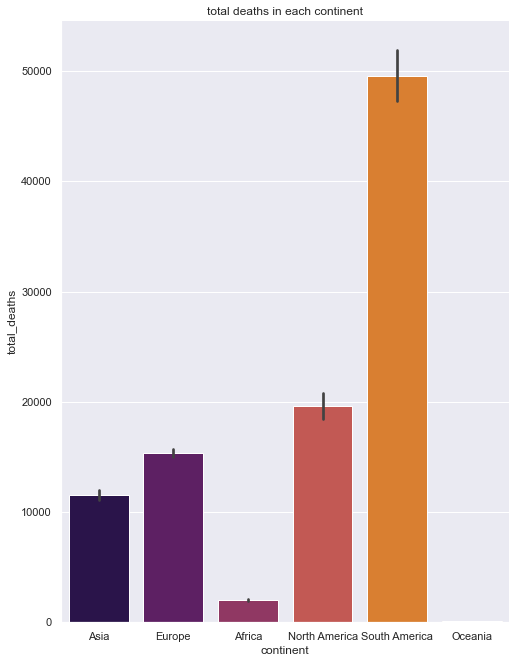

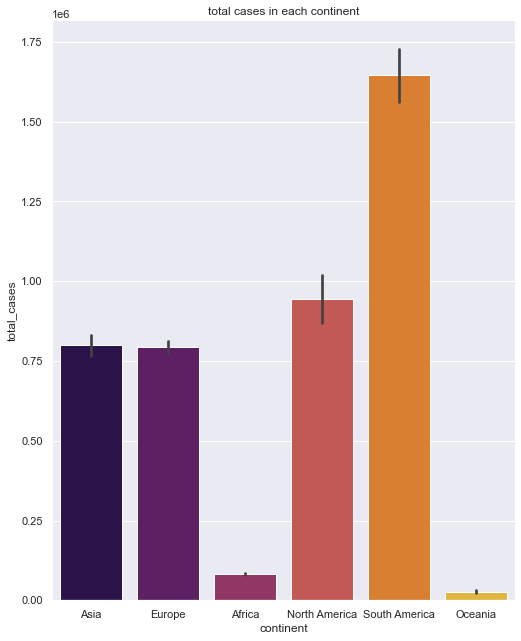

In [172]:
sns.catplot(x='continent', 
            y='total_deaths', kind='bar', palette="inferno", 
            data=clean_df)
plt.title('total deaths in each continent')
plt.gcf().set_size_inches(8, 10)


sns.catplot(x='continent', 
             y='total_cases', kind='bar', palette="inferno", 
             data=clean_df)
plt.title('total cases in each continent')
plt.gcf().set_size_inches(8, 10)

As you can see from the graph above, Europe, North America and South America have higher death rate compare with Asia in term of comparison with number of total cases.

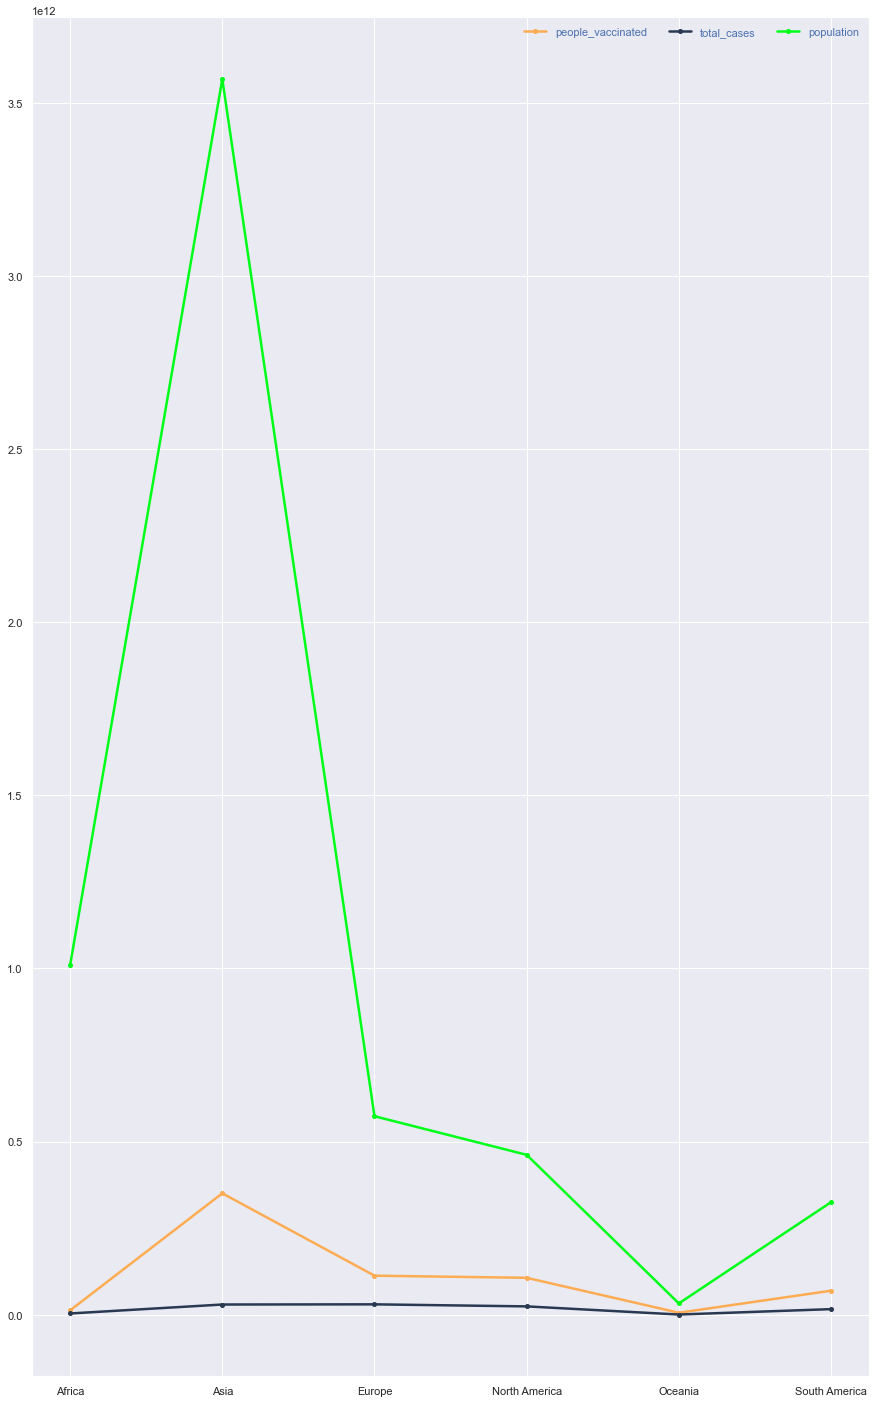

In [173]:
plt.subplots(figsize=(15, 25))

plt.plot(clean_df.groupby('continent').agg('sum')['people_vaccinated'], marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
plt.plot(clean_df.groupby('continent').agg('sum')['total_cases'], marker='o', markersize=4, color='#293952', linewidth=2.5)
plt.plot(clean_df.groupby('continent').agg('sum')['population'], marker='o', markersize=4, color='#00FE19', linewidth=2.5)

legend = plt.legend(['people_vaccinated','total_cases','population'], frameon=False, ncol=3)
plt.setp(legend.get_texts(), color='b')
plt.show()

The number of people vaccinated are directly proportional to total cases.

<AxesSubplot:>

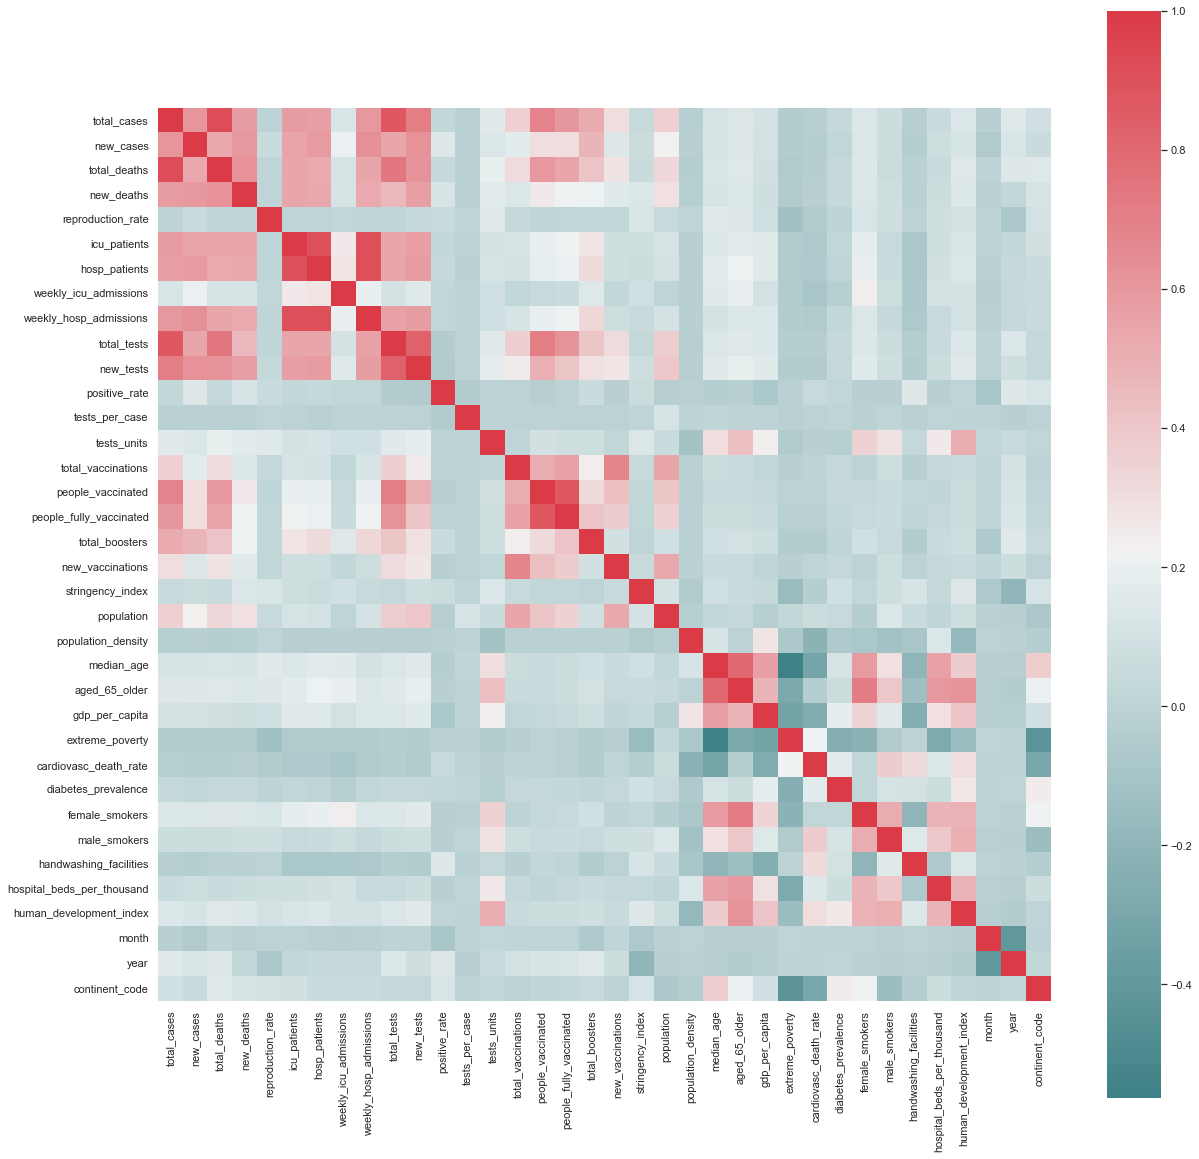

In [174]:
fi, axis = plt.subplots(figsize=(20, 20))
corr = clean_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axis)

From the figure, there are correlation between each column of dataframe which is red is high correlation and blue is low correlation.

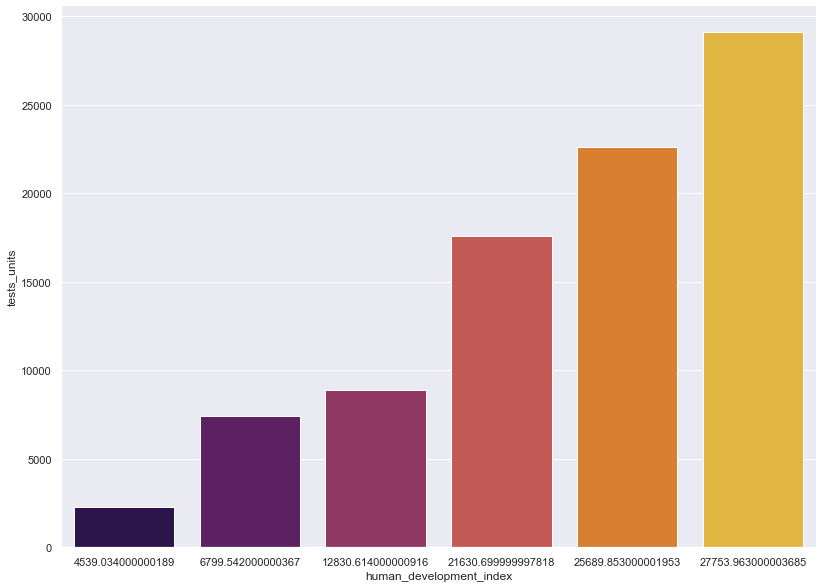

In [175]:
sns.catplot(x='human_development_index', 
            y='tests_units', kind='bar', palette="inferno", 
            data=clean_df.groupby('continent').agg('sum'))
plt.gcf().set_size_inches(15, 9)

The continent which has higher human development index will have more tests units.

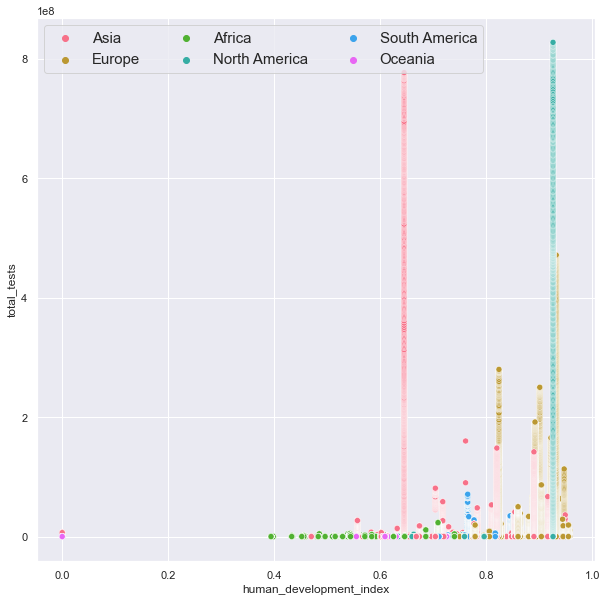

In [176]:
plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)
ax = sns.scatterplot(x='human_development_index', 
                     y='total_tests',
                     hue = 'continent',
                     palette="husl", 
                     data=clean_df)
plt.legend(fontsize=15,ncol=3)
plt.show()

The continent which has higher human development index will have more total tests. By the way, the number of total test also depend on the number of population of each continent.

Text(0.5, 1.0, '2022')

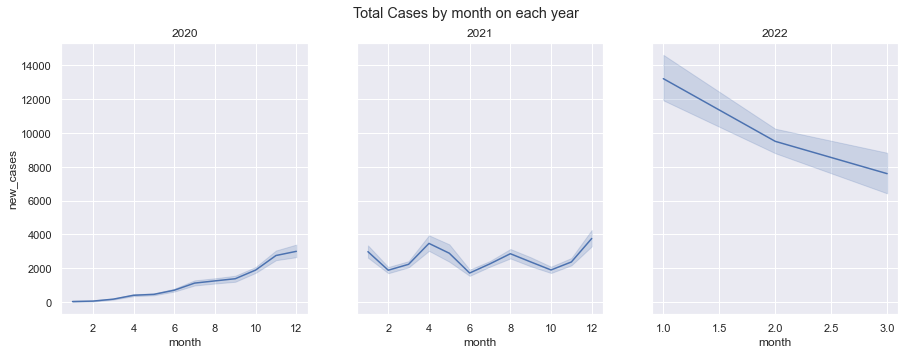

In [177]:
#Build the subplot to plot the new cases by month in each year
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Total Cases by month on each year')

# 2020
sns.lineplot(ax=axes[0], x= 'month', y='new_cases' , data = twozero)
axes[0].set_title("2020")

# 2021
sns.lineplot(ax=axes[1], x= 'month', y= 'new_cases', data = twoone)
axes[1].set_title('2021')

# 2022
sns.lineplot(ax=axes[2], x= 'month', y='new_cases' , data = twotwo)
axes[2].set_title('2022')

The total new cases is increasing every month in 2021, but the new cases in each month on 2021 is unstable because of the vaccination and the new types of covid-19. Late-2021 until the first month of 2022 is the range that highest new cases. In 2022 the total new cases in each month is decreasing as you can see on the right graph.

<AxesSubplot:xlabel='continent', ylabel='aged_65_older'>

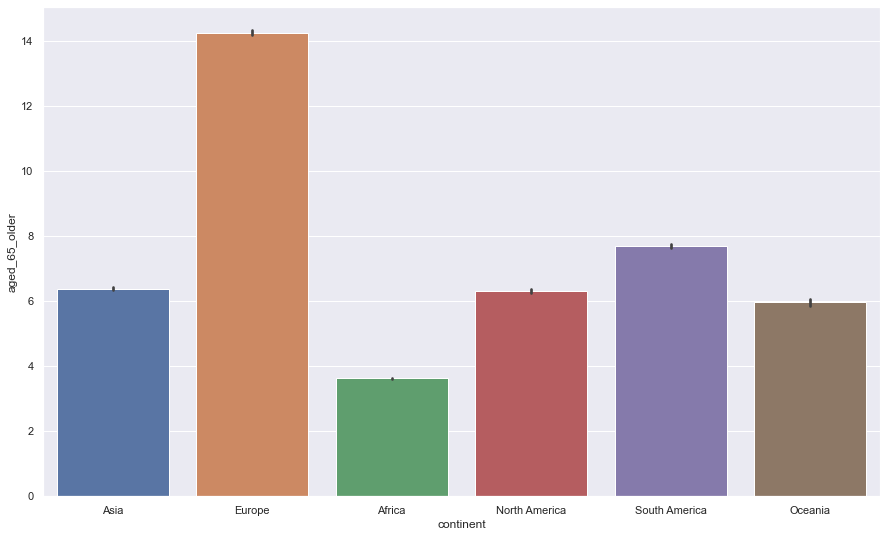

In [178]:
plt.gcf().set_size_inches(15, 9)
sns.barplot(x = 'continent', y = 'aged_65_older', data = clean_df)


The graph above show about the number of people who has age more than 65 in each continents. The result show that Europe is the continent who has the highest population with age more than 65 which is the group of people who could be in the critical condition if they are infected by covid-19. This result is relaed to the number of patinets in the hospital in each coontinent in the new graph below

[Text(0.5, 0, 'Continent'), Text(0, 0.5, 'Patients')]

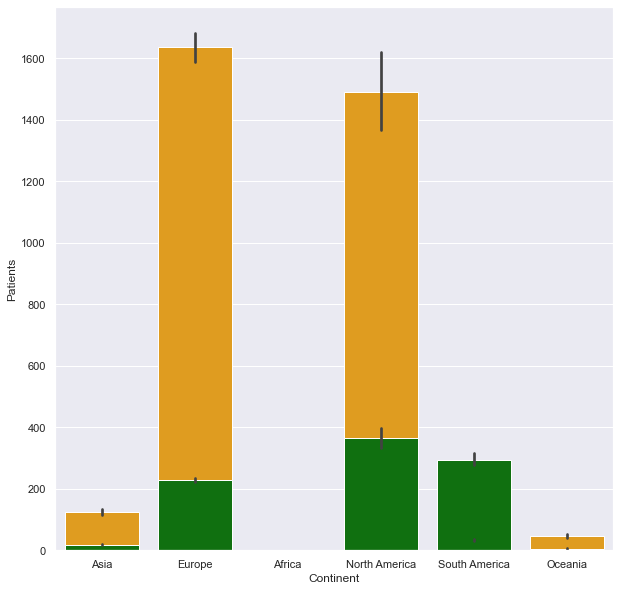

In [179]:
#Plot the graph that show about the patients in each continent
fig = plt.subplots(figsize=(10, 10))


fig = sns.barplot(x= 'continent', y = 'hosp_patients', data = clean_df , color = 'orange')
fig = sns.barplot(x= 'continent', y = 'icu_patients', data = clean_df , color = 'green')

fig.set(xlabel = 'Continent', ylabel = 'Patients')



The graph above show about the result of patients in the hospital, and ICU in each continents. The result is Europe is the continent that has highest patients in the hospital follow by North America, and Asia. However, North America is the continent that has highest pateints in ICU follow by South America , and Europe. This can conclude that countries in Europe can handle to the patients in the hospital better than North America and South America.

In [180]:
clean_df.isnull().sum()

iso_code                      0
continent                     0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
reproduction_rate             0
icu_patients                  0
hosp_patients                 0
weekly_icu_admissions         0
weekly_hosp_admissions        0
total_tests                   0
new_tests                     0
positive_rate                 0
tests_per_case                0
tests_units                   0
total_vaccinations            0
people_vaccinated             0
people_fully_vaccinated       0
total_boosters                0
new_vaccinations              0
stringency_index              0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_s

In [30]:
model_df = clean_df[['continent','total_cases','new_cases','total_deaths'
                     ,'new_deaths','icu_patients','hosp_patients','population_density',
                     'median_age','gdp_per_capita','handwashing_facilities']]

In [31]:
model_df.isnull().sum()

continent                 0
total_cases               0
new_cases                 0
total_deaths              0
new_deaths                0
icu_patients              0
hosp_patients             0
population_density        0
median_age                0
gdp_per_capita            0
handwashing_facilities    0
dtype: int64

## 2nd MileStone

In [16]:
model_df = df[['iso_code','total_cases','new_cases','total_deaths'
                     ,'new_deaths','icu_patients','hosp_patients','population_density',
                     'median_age','gdp_per_capita','handwashing_facilities']].copy()

# model_df = model_df.drop(columns = ['continent','date','location', 'new_cases_smoothed', 'new_deaths_smoothed',
#                                     'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
#                                     'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
#                                     'icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions_per_million',
#                                     'weekly_hosp_admissions_per_million','total_tests_per_thousand','new_tests_per_thousand',
#                                     'new_tests_smoothed_per_thousand','new_vaccinations_smoothed','total_vaccinations_per_hundred',
#                                     'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred',
#                                     'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred',
#                                     'aged_70_older','life_expectancy','new_tests_smoothed','excess_mortality_cumulative_per_million','excess_mortality',
#                                     'excess_mortality_cumulative','excess_mortality_cumulative_absolute'
#                                     ])
# model_df['tests_units'] = model_df['tests_units'].notnull().astype("int")
# model_df = model_df.dropna(subset=['continent'])

In [17]:

model_df['total_cases'] = model_df['total_cases'].fillna(method="ffill")
model_df['new_cases'] = model_df['new_cases'].fillna(method="ffill")
model_df['total_deaths'] = model_df['total_deaths'].fillna(method="ffill")
model_df['new_deaths'] = model_df['new_deaths'].fillna(method="ffill")
model_df['icu_patients'] = model_df['icu_patients'].fillna(method="ffill")
model_df['hosp_patients'] = model_df['hosp_patients'].fillna(method="ffill")
# model_df['weekly_icu_admissions'] = model_df['weekly_icu_admissions'].fillna(method="ffill")
# model_df['weekly_hosp_admissions'] = model_df['weekly_hosp_admissions'].fillna(method="ffill")
# model_df['new_tests'] = model_df['new_tests'].fillna(method="ffill")
# model_df['total_tests'] = model_df['total_tests'].fillna(method="ffill")
# model_df['total_vaccinations'] = model_df['total_vaccinations'].fillna(method="ffill")
# model_df['people_vaccinated'] = model_df['people_vaccinated'].fillna(method="ffill")
# model_df['people_fully_vaccinated'] = model_df['people_fully_vaccinated'].fillna(method="ffill")
# model_df['total_boosters'] = model_df['total_boosters'].fillna(method="ffill")
# model_df['new_vaccinations'] = model_df['new_vaccinations'].fillna(method="ffill")
# model_df['population'] = model_df['population'].fillna(method="ffill")
model_df['population_density'] = model_df['population_density'].fillna(method="ffill")
# clean_df['median_age'] = clean_df['median_age'].fillna(0)
# model_df['aged_65_older'] = model_df['aged_65_older'].fillna(method="ffill")
model_df['gdp_per_capita'] = model_df['gdp_per_capita'].fillna(method="ffill")
# model_df['cardiovasc_death_rate'] = model_df['cardiovasc_death_rate'].fillna(method="ffill")
# model_df['diabetes_prevalence'] = model_df['diabetes_prevalence'].fillna(method="ffill")
# model_df['extreme_poverty'] = model_df['extreme_poverty'].fillna(method="ffill")
# model_df['female_smokers'] = model_df['female_smokers'].fillna(method="ffill")
# model_df['male_smokers'] = model_df['male_smokers'].fillna(method="ffill")
model_df['handwashing_facilities'] = model_df['handwashing_facilities'].fillna(method="ffill")
# model_df['hospital_beds_per_thousand'] = model_df['hospital_beds_per_thousand'].fillna(method="ffill")
# model_df['human_development_index'] = model_df['human_development_index'].fillna(method="ffill")

In [18]:
model_df.isnull().sum()

iso_code                      0
total_cases                   0
new_cases                     0
total_deaths                 28
new_deaths                   28
icu_patients               2397
hosp_patients              9057
population_density            0
median_age                28775
gdp_per_capita                0
handwashing_facilities        0
dtype: int64

In [19]:
total = model_df.isnull().sum().sort_values(ascending=False)
percent = (model_df.isnull().sum()/model_df.isnull().count())
percent = percent.sort_values(ascending=False)
missing_data = pd.concat(
    [total, percent], axis=1, keys=['Total', 'Percent'])
print('Missing data:')
missing_data.head(20)

Missing data:


,Total,Percent
median_age,28775,0.171345
hosp_patients,9057,0.053931
icu_patients,2397,0.014273
new_deaths,28,0.000167
total_deaths,28,0.000167
handwashing_facilities,0,0.000000
gdp_per_capita,0,0.000000
population_density,0,0.000000
new_cases,0,0.000000
total_cases,0,0.000000


In [20]:
replace_values = {}
for column in model_df.columns:
  if model_df[column].isnull().any():
    if model_df[column].dtype == np.float64:
      # Use mean for float
      replace_values[column] = model_df[column].mean()
    elif model_df[column].dtype == type(object):
      # Use 'UNK' keyword for string
      replace_values[column] = 'NaN'
print(replace_values)

{'total_deaths': 57433.48330037878, 'new_deaths': 155.3668556590514, 'icu_patients': 893.4145307148165, 'hosp_patients': 5730.2577810786825, 'median_age': 30.56541919072154}


In [21]:
model_df = model_df.fillna(value=replace_values)

In [22]:
model_df.isnull().sum()

iso_code                  0
total_cases               0
new_cases                 0
total_deaths              0
new_deaths                0
icu_patients              0
hosp_patients             0
population_density        0
median_age                0
gdp_per_capita            0
handwashing_facilities    0
dtype: int64

In [268]:
model_df.head(100)

,iso_code,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,population_density,median_age,gdp_per_capita,handwashing_facilities
0,AFG,5.0,5.0,57433.4833,155.366856,893.414531,5730.257781,54.422,18.6,1803.987,37.746
1,AFG,5.0,0.0,57433.4833,155.366856,893.414531,5730.257781,54.422,18.6,1803.987,37.746
2,AFG,5.0,0.0,57433.4833,155.366856,893.414531,5730.257781,54.422,18.6,1803.987,37.746
3,AFG,5.0,0.0,57433.4833,155.366856,893.414531,5730.257781,54.422,18.6,1803.987,37.746
4,AFG,5.0,0.0,57433.4833,155.366856,893.414531,5730.257781,54.422,18.6,1803.987,37.746
...,...,...,...,...,...,...,...,...,...,...,...
95,AFG,13745.0,643.0,250.0000,11.000000,893.414531,5730.257781,54.422,18.6,1803.987,37.746
96,AFG,14529.0,784.0,252.0000,2.000000,893.414531,5730.257781,54.422,18.6,1803.987,37.746
97,AFG,15180.0,651.0,254.0000,2.000000,893.414531,5730.257781,54.422,18.6,1803.987,37.746
98,AFG,15836.0,656.0,269.0000,15.000000,893.414531,5730.257781,54.422,18.6,1803.987,37.746


In [269]:
X = model_df.drop(columns=['iso_code']).values
y = model_df['iso_code'].values

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


In [272]:
leaf = [None] * 30
accuracy_train = [None] *30
accuracy_valid = [None] * 30
for i in range(1,30):
    model = RandomForestClassifier(min_samples_leaf = i)
    model = model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train) # YOUR CODE HERE
    y_hat_valid = model.predict(X_valid)
    leaf[i] = i
    accuracy_train[i] = accuracy_score(y_true=y_train, y_pred=y_hat_train)
    accuracy_valid[i] = accuracy_score(y_true=y_valid, y_pred=y_hat_valid)

In [275]:
for i in range(1,30):
    print(leaf[i], ": ",'train_acc: ', accuracy_train[i], 'valid_acc: ', accuracy_valid[i])

1 :  train_acc:  1.0 valid_acc:  0.9990472787900441
2 :  train_acc:  0.9999181230833358 valid_acc:  0.9991068238656663
3 :  train_acc:  0.9998362461666717 valid_acc:  0.9989281886387996
4 :  train_acc:  0.999784142674249 valid_acc:  0.9989281886387996
5 :  train_acc:  0.999687379045464 valid_acc:  0.9988090984875551
6 :  train_acc:  0.9996650489772829 valid_acc:  0.9986304632606884
7 :  train_acc:  0.999590615416679 valid_acc:  0.9987495534119328
8 :  train_acc:  0.9995533986363772 valid_acc:  0.9986304632606884
9 :  train_acc:  0.9994789650757734 valid_acc:  0.9986900083363106
10 :  train_acc:  0.9995310685681961 valid_acc:  0.9986304632606884
11 :  train_acc:  0.9994268615833507 valid_acc:  0.9985113731094438
12 :  train_acc:  0.9994045315151696 valid_acc:  0.9986304632606884
13 :  train_acc:  0.9993375413106261 valid_acc:  0.9988686435631773
14 :  train_acc:  0.9993524280227469 valid_acc:  0.9986900083363106
15 :  train_acc:  0.9992705511060828 valid_acc:  0.9986304632606884
16 :  t

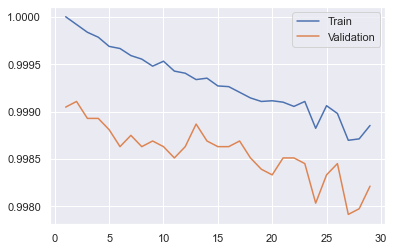

In [276]:
plt.plot(leaf, accuracy_train, label = "Train")
plt.plot(leaf, accuracy_valid, label = "Validation")
plt.legend()
plt.show()

In [277]:
model = RandomForestClassifier(min_samples_leaf = 1)
model = model.fit(X_train, y_train)
y_hat_train = model.predict(X_train) # YOUR CODE HERE
y_hat_valid = model.predict(X_valid)

In [278]:
print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print("Precision Score : ",precision_score(y_true = y_train, y_pred = y_hat_train, average='micro'))
print("Precision Score : ",recall_score(y_true = y_train, y_pred = y_hat_train, average='micro'))
print("F1 Score : ",f1_score(y_true = y_train, y_pred = y_hat_train, average='micro'))
print('')
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print("Precision Score : ",precision_score(y_true=y_valid, y_pred=y_hat_valid, average='micro'))
print("Precision Score : ",recall_score(y_true=y_valid, y_pred=y_hat_valid, average='micro'))
print("F1 Score : ",f1_score(y_true=y_valid, y_pred=y_hat_valid, average='micro'))

Training Set
[[605   0   0 ...   0   0   0]
 [  0 607   0 ...   0   0   0]
 [  0   0 579 ...   0   0   0]
 ...
 [  0   0   0 ... 611   0   0]
 [  0   0   0 ...   0 584   0]
 [  0   0   0 ...   0   0 577]]
Accuracy: 1.00
Precision Score :  1.0
Precision Score :  1.0
F1 Score :  1.0

Validation Set
[[66  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  0]
 [ 0  0 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 79  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  0  0 ...  0  0 84]]
Accuracy: 1.00
Precision Score :  0.9990472787900441
Precision Score :  0.9990472787900441
F1 Score :  0.9990472787900441


In [255]:
y_hat_test = model.predict(X_test)

In [280]:
print('Test Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print("Precision Score : ",precision_score(y_true=y_test, y_pred=y_hat_test, average='micro'))
print("Precision Score : ",recall_score(y_true=y_test, y_pred=y_hat_test, average='micro'))
print("F1 Score : ",f1_score(y_true=y_test, y_pred=y_hat_test, average='micro'))

Test Set
Accuracy: 1.00
Precision Score :  1.0
Precision Score :  1.0
F1 Score :  1.0


In [285]:
model_df.tail()

,iso_code,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,population_density,median_age,gdp_per_capita,handwashing_facilities
167931,ZWE,240343.0,633.0,5400.0,1.0,4636.0,23718.0,42.729,19.6,1899.775,36.791
167932,ZWE,240343.0,0.0,5400.0,0.0,4636.0,23718.0,42.729,19.6,1899.775,36.791
167933,ZWE,241548.0,1205.0,5408.0,8.0,4636.0,23718.0,42.729,19.6,1899.775,36.791
167934,ZWE,241548.0,0.0,5408.0,0.0,4636.0,23718.0,42.729,19.6,1899.775,36.791
167935,ZWE,242069.0,521.0,5412.0,4.0,4636.0,23718.0,42.729,19.6,1899.775,36.791


In [291]:
model_df.loc[model_df['iso_code'] == 'THA']

,iso_code,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,population_density,median_age,gdp_per_capita,handwashing_facilities
149756,THA,33726.0,106.0,800.0,0.0,137.0,1595.0,135.132,40.1,16277.671,90.67
149757,THA,33726.0,106.0,800.0,0.0,137.0,1595.0,135.132,40.1,16277.671,90.67
149758,THA,33726.0,106.0,800.0,0.0,137.0,1595.0,135.132,40.1,16277.671,90.67
149759,THA,33726.0,106.0,800.0,0.0,137.0,1595.0,135.132,40.1,16277.671,90.67
149760,THA,33726.0,106.0,800.0,0.0,137.0,1595.0,135.132,40.1,16277.671,90.67
...,...,...,...,...,...,...,...,...,...,...,...
150550,THA,3088873.0,22073.0,23438.0,69.0,137.0,1595.0,135.132,40.1,16277.671,90.67
150551,THA,3111857.0,22984.0,23512.0,74.0,137.0,1595.0,135.132,40.1,16277.671,90.67
150552,THA,3136649.0,24792.0,23575.0,63.0,137.0,1595.0,135.132,40.1,16277.671,90.67
150553,THA,3161241.0,24592.0,23643.0,68.0,137.0,1595.0,135.132,40.1,16277.671,90.67


In [293]:
print(model.predict([[33726,106,800,137,1595,0,135,40,16277,90.68]]))

['THA']


## Fill none value using KNN Method


In [4]:
from sklearn.impute import KNNImputer 

In [5]:
knn_df = df[['iso_code','total_cases','new_cases','total_deaths'
                     ,'new_deaths','icu_patients','hosp_patients','population_density',
                     'median_age','gdp_per_capita','handwashing_facilities']].copy()

In [9]:
imputer = KNNImputer(n_neighbors = 2)
knn_filled = imputer.fit_transform(knn_df[['total_cases','new_cases','total_deaths'
                     ,'new_deaths','icu_patients','hosp_patients','population_density',
                     'median_age','gdp_per_capita','handwashing_facilities']])

In [11]:
knn_filled

array([[5.000000e+00, 5.000000e+00, 1.000000e+00, ..., 1.860000e+01,
        1.803987e+03, 3.774600e+01],
       [5.000000e+00, 0.000000e+00, 1.000000e+00, ..., 1.860000e+01,
        1.803987e+03, 3.774600e+01],
       [5.000000e+00, 0.000000e+00, 1.000000e+00, ..., 1.860000e+01,
        1.803987e+03, 3.774600e+01],
       ...,
       [2.415480e+05, 1.205000e+03, 5.408000e+03, ..., 1.960000e+01,
        1.899775e+03, 3.679100e+01],
       [2.415480e+05, 0.000000e+00, 5.408000e+03, ..., 1.960000e+01,
        1.899775e+03, 3.679100e+01],
       [2.420690e+05, 5.210000e+02, 5.412000e+03, ..., 1.960000e+01,
        1.899775e+03, 3.679100e+01]])

In [12]:
knn_df

,iso_code,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,population_density,median_age,gdp_per_capita,handwashing_facilities
0,AFG,5.0,5.0,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,37.746
1,AFG,5.0,0.0,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,37.746
2,AFG,5.0,0.0,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,37.746
3,AFG,5.0,0.0,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,37.746
4,AFG,5.0,0.0,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,37.746
...,...,...,...,...,...,...,...,...,...,...,...
167931,ZWE,240343.0,633.0,5400.0,1.0,NaN,NaN,42.729,19.6,1899.775,36.791
167932,ZWE,240343.0,0.0,5400.0,0.0,NaN,NaN,42.729,19.6,1899.775,36.791
167933,ZWE,241548.0,1205.0,5408.0,8.0,NaN,NaN,42.729,19.6,1899.775,36.791
167934,ZWE,241548.0,0.0,5408.0,0.0,NaN,NaN,42.729,19.6,1899.775,36.791


In [13]:
knn_filled_df = pd.DataFrame(knn_filled, columns = ['total_cases','new_cases','total_deaths'
                     ,'new_deaths','icu_patients','hosp_patients','population_density',
                     'median_age','gdp_per_capita','handwashing_facilities'])

In [29]:
df['iso_code'] 

0         AFG
1         AFG
2         AFG
3         AFG
4         AFG
         ... 
167931    ZWE
167932    ZWE
167933    ZWE
167934    ZWE
167935    ZWE
Name: iso_code, Length: 167936, dtype: object

In [30]:
knn_filled_df['iso_code'] = df['iso_code']

In [31]:
knn_filled_df

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,population_density,median_age,gdp_per_capita,handwashing_facilities,iso_code
0,5.0,5.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746,AFG
1,5.0,0.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746,AFG
2,5.0,0.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746,AFG
3,5.0,0.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746,AFG
4,5.0,0.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746,AFG
...,...,...,...,...,...,...,...,...,...,...,...
167931,240343.0,633.0,5400.0,1.0,41.5,8403.0,42.729,19.6,1899.775,36.791,ZWE
167932,240343.0,0.0,5400.0,0.0,41.5,8403.0,42.729,19.6,1899.775,36.791,ZWE
167933,241548.0,1205.0,5408.0,8.0,45.0,8541.5,42.729,19.6,1899.775,36.791,ZWE
167934,241548.0,0.0,5408.0,0.0,45.0,8541.5,42.729,19.6,1899.775,36.791,ZWE


In [32]:
knn_filled_df.isnull().sum()

total_cases               0
new_cases                 0
total_deaths              0
new_deaths                0
icu_patients              0
hosp_patients             0
population_density        0
median_age                0
gdp_per_capita            0
handwashing_facilities    0
iso_code                  0
dtype: int64

In [35]:
iso = knn_filled_df.pop('iso_code')


KeyError: 'iso_code'

In [36]:
knn_filled_df.insert(0,'iso_code',iso)

In [37]:
knn_filled_df

,iso_code,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,population_density,median_age,gdp_per_capita,handwashing_facilities
0,AFG,5.0,5.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746
1,AFG,5.0,0.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746
2,AFG,5.0,0.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746
3,AFG,5.0,0.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746
4,AFG,5.0,0.0,1.0,0.0,71.5,661.5,54.422,18.6,1803.987,37.746
...,...,...,...,...,...,...,...,...,...,...,...
167931,ZWE,240343.0,633.0,5400.0,1.0,41.5,8403.0,42.729,19.6,1899.775,36.791
167932,ZWE,240343.0,0.0,5400.0,0.0,41.5,8403.0,42.729,19.6,1899.775,36.791
167933,ZWE,241548.0,1205.0,5408.0,8.0,45.0,8541.5,42.729,19.6,1899.775,36.791
167934,ZWE,241548.0,0.0,5408.0,0.0,45.0,8541.5,42.729,19.6,1899.775,36.791


In [38]:
knn_filled_df.to_csv('KNN_filled.csv')